In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
# Display the first few rows of the dataset
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:
# Separate features (X) and target variable (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [10]:
# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [11]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [13]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8625
Confusion Matrix:
[[50  2]
 [ 9 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [14]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

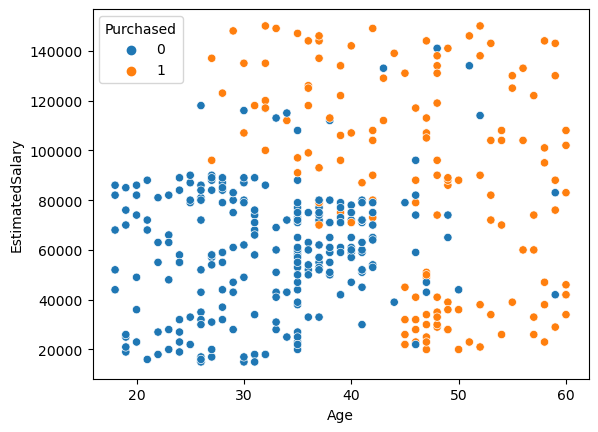

In [15]:
# Plot the data points
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

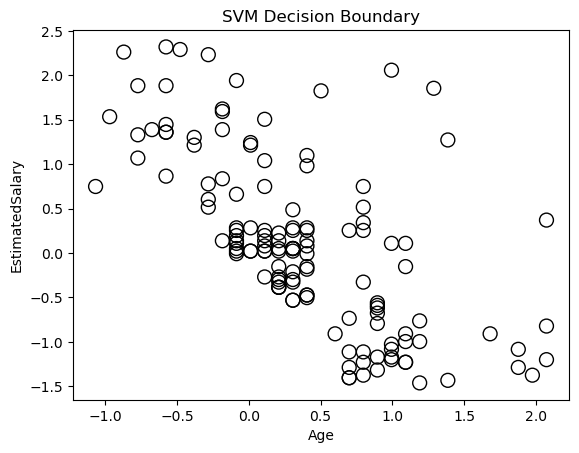

In [16]:
# Highlight support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o')

plt.title('SVM Decision Boundary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()